# Lecture 2: Introduction to Bayesian Econometrics
In the first lecture we discussed what it meant to think like a Bayesian. In this lecture we will learn how thinking like a Bayesian effects the way that we do econometrics, but first load some useful packages used throughout the lecture.

In [29]:
# Use packages 
using Distributions
using Plots
using Interact
using SpecialFunctions

## What is Bayesian Econometrics?
Bayesian econometrics is the use of the statistical methods and the Bayesian interpretation of probability (i.e., Bayesian statistics) to answer economic questions (hence the name). 

In this lecture we will learn how to do Bayesian econometrics: estimation, hypothesis testing and prediction, and continue to contrast classical and Bayesian thinking.

## How do we do Bayesian Econometrics?
A nice feature of Bayesian econometrics is that we use Bayes theorem for estimation, hypothesis testing and prediction. Bayes’ theorem states that for events $A$ and $B$, with $P(B) > 0$, the conditional probability of $A$ given $B$ is

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$ 

**Example**: Suppose that a student is taking a course on Bayesian statistics without having taken the prerequisite subjects, and wants to know the probability of passing the exam. They talk to the lecturer and discover that past data indicates that 16% of the students in the course haven't taken the prerequisite subjects and 80% of all students who take the final exam passed. They also learn that among those students who passed, 10% haven't taken the prerequisite subjects. In this case $A$ is the event "pass" and $B$ is the event "haven't taken the prerequisite subjects". Thus, $P(A) = 0.8$, $P(B) = 0.16$ and $P(B|A) = 0.1$. Bayes’ theorem tells you: that $P(A|B) = (0.1 * 0.8)/0.16 = 0.50$. In other words, if the student hasn't taken the prerequisite subjects, then the probability of them passing the exam is 50%. 

## Estimation
Let $\mathbf{y}$ denote a set of observations from an arbitrary data set (cross-sectional, time-series or panel data is fine), and suppose that we want to estimate a model $M$ (e.g. a linear regression model) with associated parameter vector $\theta$, and *likelihood function* $p(\mathbf{y}|\theta)$.

In Bayesian statistics, we estimate $\theta$ in two steps:
1. Before seeing the data, we form a prior belief about $\theta$, known as the *prior distribution* $p(\theta)$
2. After seeing the data, we form a posterior belief about $\theta$, known as the *posterior distribution* $p(\theta|\mathbf{y})$. This is done by combining the prior belief with evidence from the model likelihood via Bayes rule, i.e.
$$
    p(\theta|\mathbf{y}) = \frac{p(\mathbf{y}|\theta)p(\theta)}{p(\mathbf{y})}
$$ 
The denominator of this expression $p(\mathbf{y})$ is called the *marginal likelihood* (also known as the *marginal data density*) because it's defined by *marginalizing* (i.e. integrating/summing) over all possible values of $\theta$
$$
    p(\mathbf{y}) = \int_{\Theta}p(\mathbf{y}|\theta)p(\theta)d\theta
$$
in which $\Theta$ denotes the parameter space. The marginal likelihood plays a key role in hypothesis testing and we will return to it later in the lecture. For now, note that since the marginal likelihood does not contain the model parameters, we can suppress it and work with the simpler expression
$$
    p(\theta|\mathbf{y}) \propto p(\mathbf{y}|\theta)p(\theta)
$$
which states that the the posterior is proportional to the likelihood times the prior.

**Remarks**:
1. In principle the application of Bayes theorem assumes that we have the correct prior and likelihood function. In practice, there is no way to know for sure and we act if we have the correct framework.
2. In principle the prior represents our subjective belief about the model parameters before seeing the data. In practice, this is rarely the case. Instead, we use our experience to formulate priors. 
3. The process of *marginalizing* a distribution over all possible values of $\theta$ is also commonly referred to as *integrating out* $\theta$ and we will these terms interchangeably throughout the course.
4. Any nonnegative function $f(x)$ proportional to a probability density function $p(x)$ is a kernel of $p(x)$. The expression on the right side of the proportional sign is a kernel of the posterior density, and is sometimes referred to as the *posterior density kernel* in contrast to the *normalized posterior density* which involves the marginal likelihood. 

**Worked Example: Coin flip**
Suppose we are interested in estimating the probability that a coin will show heads. We proceed in two steps:
1. Build a model
2. Estimate the probability using Bayes' rule

To build the model, let $Y$ be a random variable that represents the coin showing Heads, $y=1$ denote a success (the coin shows Heads), $y=0$ denote a failure (the coin shows tails), and $\theta$ denote the probability that the coin will show Heads. Then,
$$ 
P(Y=y) = \begin{cases} 
           \theta   &, y = 1 \\
           1-\theta &, y = 0 
         \end{cases}
$$
This means that $Y$ is a [*Bernoulli random variable*](https://en.wikipedia.org/wiki/Bernoulli_random_variable) with parameter $\theta$, i.e. $Y\sim \text{Ber}(\theta)$, and it's probability mass function (PMF) is given by 
$$ 
    p(Y|\theta) = \theta^y (1-\theta)^{(1-y)}
$$

Now let $\{Y_1,\dots,Y_n\}$ denote a set of $n$ independent random variables that each represent the coin showing Heads in $n$ indpednent flips. The joint PMF of these $n$ flips is given by
$$	
\begin{align}
    p(Y_1=y_1,\dots,Y_n=y_n | \theta) &= \prod_{i = 1}^{n} \theta^{y_i} (1 - \theta)^{1-y_i}\\
                              &= \theta^s(1-\theta)^{n-s} 
\end{align}
$$
in which $s=\sum_{i=1}^{n}y_i$. 


**Remarks**: 
1. The likelihood function has the same form as the joint pmf.
2. This model would be the same regardless of whether we take a Bayesian or frequentist perspective. The only difference is in how we interpret the probabilities (see Lecture 1).

Having built the model, we now form a prior belief about the model parameters, in this case $\theta$. Since probabilities are defined to be between 0 and 1, we will characterize our prior beliefs about $\theta$ by a *[Beta distribution*](https://en.wikipedia.org/wiki/Beta_distribution) with shape parameters $\alpha_0$ and $\beta_0$, i.e. $\theta \sim \text{Beta}(\alpha_0,\beta_0)$. The probability density function (pdf) for this prior is
$$
    p(\theta) = \frac{\theta^{\alpha_0-1} (1- \theta)^{\beta_0 - 1} }{B({\alpha_0}, {\beta_0})},
$$
in which $B({\alpha_0}, {\beta_0})$ is the Beta function. 

We can incorporate our beliefs about the probability of a coin flip showing heads by choosing appropriate values of $\alpha_0$ and $\beta_0$. For instance, since the mean of the prior is
$$
    \mathbb{E}[\theta] = \frac{\alpha_0}{\alpha_0 + \beta_0} 
$$
setting $\alpha_0=\beta_0 = 1$ implies $\mathbb{E}[\theta] = 1/2$. Other moments, e.g. the variance, can be also targeted.

**Remarks:** 
1. In Bayesian statistics, we refer to the parameter(s) of the prior distribution as *hyperparameter(s)*. This is used to distinguish them from parameters of the model which we want to estimate. In our example, the hyperparameters are the shape parameters of the Beta prior $\alpha_0$ and $\beta_0$ and the model parameter is the probability parameter in the Bernoulli likelihood $\theta$. 
2. We choose the Beta distribution as the prior because it balances the following aspects
    1. *Natural support*: It has support between 0 and 1 
    2. *Flexibility*: The probability density function (pdf) can take numerous shapes (see code below) thereby expressing numerous beliefs.
    3. [*Conjugacy*](https://en.wikipedia.org/wiki/Conjugate_prior): It results in an analytical posterior distribution (see derivations below). This would not be the case if we used, e.g. a Normal distribution which is truncated to $[0,1]$.   
3. A prior is said to be (note that the definitions are rather vague but commonly used)
    1. *Uninformative* if it assigns equal probability to all outcomes (E.g. Beta(1,1)). 
    2. *Weakly informative* if it assigns some more probability to some value/region of the parameter space, but has a wide variance (E.g. Beta(2,2)). 
    3. *Informative* if it assigns a lot of probability to some value/region of the parameter space, with low variance (E.g. Beta(0.1,5)).

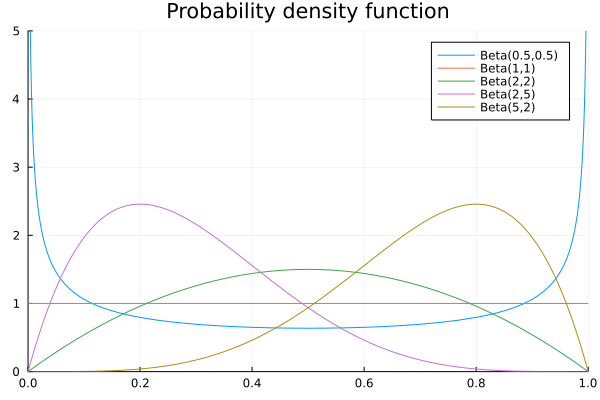

In [30]:
# Plot Beta PDF and CDF for various hyperparameter values
RV1 = Beta(0.5,0.5)
RV2 = Beta(1,1)
RV3 = Beta(2,2)
RV4 = Beta(2,5)
RV5 = Beta(5,2)

plot([x -> pdf(RV1, x), x -> pdf(RV2, x), x -> pdf(RV3, x), x -> pdf(RV4, x), x -> pdf(RV5, x)], 
            0, 1, 
            xlims = (0,1),
            ylims = (0,5),
            title = "Probability density function",
            labels=["Beta(0.5,0.5)" "Beta(1,1)" "Beta(2,2)" "Beta(2,5)" "Beta(5,2)"])

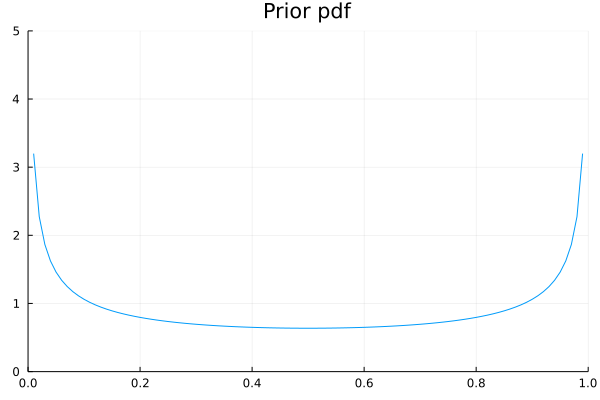

In [31]:
# Widget showing how the hyperparameters of the Beta distribution impact the shape of the pdf
alpha0 = 0.5
beta0 = 0.5
n = 100

RV = Beta(alpha0, beta0)

x = collect(0:0.01:1)

plot(x, x -> pdf(RV, x), xlims = (0,1), ylims = (0,5), title = "Prior pdf", labels = false)

Now that we have built the model and formulated priors, we are ready to compute the posterior distribution. To that end, we apply Bayes's theorem as follows

$$
    \begin{align*}
        p(\theta | \mathbf{y})  &\propto p(\mathbf{y} | \theta) p(\theta)\\
                                &= \underset{p(\mathbf{y} | \theta)}{\underbrace{\theta^{s} (1-\theta)^{n-s}}} \underset{p(\theta)}{\underbrace{\frac{\theta^{\alpha_0-1} (1- \theta)^{\beta_0 - 1}}{B({\alpha_0}, {\beta_0})}}}\\
                                &\propto \theta^{s} (1-\theta)^{n-s}  \theta^{\alpha_0-1} (1- \theta)^{\beta_0 - 1} \\
                                &= \theta^{s + \alpha_0 -1} (1 - \theta)^{n-s + \beta_0 - 1 } \\
	\end{align*}
$$    

If we stare at this final expression long enough, then we will (hopefully) realize that it is a Beta distribution in $\theta$ with parameters $\alpha = \alpha_0 + s  $ and $\beta = \beta_0 + n - s$. This means that $\theta|\mathbf{y} \sim \text{Beta}(\alpha, \beta)$ and the posterior distribution is given by
$$	
	p(\theta | \mathbf{y}) = \frac{\theta^{{\alpha} - 1} (1-\theta)^{{\beta} - 1}}{B({\alpha}, {\beta})},
$$

where $\alpha = \alpha_0 + s  $ and $\beta = n-s + \beta_0$.

**Exercise:** Show that the marginal likelihood of the posterior distribution $p(\mathbf{y})$ is equal to $\frac{B({\alpha}, {\beta})}{B({\alpha_0}, {\beta_0})}$, thereby confirming that the posterior distribution is a Beta distribution in $\theta$ with parameter $\alpha$ and $\beta$.

*Solution*: We can compute the marginal likelihood $p(\mathbf{y})$ of the posterior distribution $p(\mathbf{y}|\theta)$ as follows
$$	
\begin{align}
        p(\mathbf{y}) &= \int_{0}^{1} p(\mathbf{y} | \theta) p(\theta) d\theta\\
                      &= \int_{0}^{1} \underset{p(\mathbf{y} | \theta)}{\underbrace{\theta^{s} (1-\theta)^{n-s}}} \underset{p(\theta)}{\underbrace{\frac{\theta^{\alpha_0-1} (1- \theta)^{\beta_0 - 1}}{B({\alpha_0}, {\beta_0})}}}d\theta\\
                      &= \int_{0}^{1} \frac{\theta^{\alpha - 1} (1-\theta)^{\beta  - 1}}{B({\alpha_0}, {\beta_0})}d\theta\\ 
                      &= \frac{B({\alpha}, {\beta})}{B({\alpha_0}, {\beta_0})}
\end{align}
$$        
where $\alpha = \alpha_0 + s  $ and $\beta = n-s + \beta_0$. Hence the posterior distribution is 
$$	
\begin{align}
	p(\theta | \mathbf{y}) &= \frac{p(\mathbf{y} | \theta) p(\theta)}{p(\mathbf{y})} \\
						   &= \frac{\theta^{{\alpha} - 1} (1-\theta)^{{\beta}  - 1}}{B({\alpha_0}, {\beta_0})} \frac{B({\alpha_0}, {\beta_0})}{B({\alpha}, {\beta})} \\
						   &= \frac{\theta^{{\alpha} - 1} (1-\theta)^{{\beta}  - 1}}{B({\alpha}, {\beta})},
\end{align}
$$
which is a beta distribution with parameter ${\alpha}$ and ${\beta}$, i.e. $\theta|\mathbf{y} \sim \text{Beta}({\alpha}, {\beta})$.

**Remarks:** 
1. **Conjugate priors**: In this example the prior and posterior are in the same family of distributions, i.e. Beta. This property is called *conjugacy* and we say that the Beta prior is a *conjugate prior* to the Bernoulli likelihood. More generally, we say that a conjugate prior distribution is one which, when combined with the likelihood, yields a posterior that falls in the same class of distributions. Conjugate priors are very useful in practice because they provide us with an analytical posterior distribution. As we will see later in the course, conjugate priors do not always exist, and we often need numerical methods to learn about the posterior.
2. **Natural conjugate priors**: *Natural conjugate priors* are priors that have the same functional form as the likelihood function (and consequently yield the same posterior). See homework problems for numerous examples. 

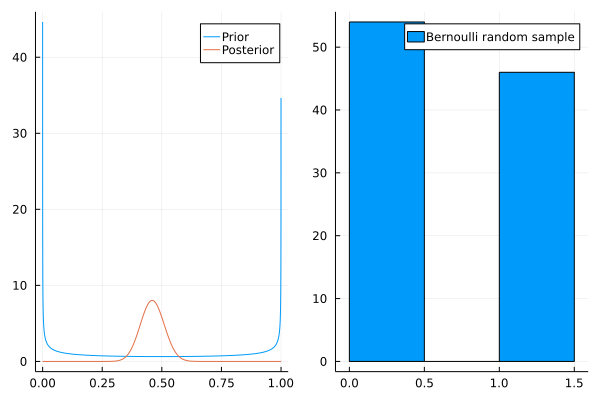

In [32]:
alpha0 = 0.5
beta0 = 0.5
n = 100

theta = 0.5
RV1 = Bernoulli(theta)

y = rand(RV1, n)

s = sum(y)

if isnan(s)
    s = 0
end

prior = Beta(alpha0,beta0)       

alphap = alpha0 + s
betap =  beta0 + n - s
posterior = Beta(alphap, betap)

p1 = plot([x -> pdf(prior, x), x -> pdf(posterior, x)], 0, 1, label=["Prior" "Posterior"]); 
p2 = histogram(y, label="Bernoulli random sample");
plot(p1,p2,layout = (1,2))


Armed with the posterior distribution, we can now present our results. There are generally three types of results that Bayesians are interested in:
1. Posterior analysis
2. Hypothesis testing
3. Prediction

We will consider each in turn.

### Posterior analysis
We doing research, we generally want to produce quantities of interest such as point and interval estimates. Since the posterior distribution in this example has an analytical representation (meaning that we can solve for it using pen and paper) we can use properties of the Beta distribution to compute such quantities of interest. In many examples this won't be possible and we will need to instead rely on numerical methods (more on this later in the course).

#### Point estimation 
Bayesian point estimation begins by specifying a *loss function* (also known as a *cost function*), denoted $L(\hat{\theta},\theta)$ which satisfies the following properties
1. Non-negative: $L(\hat{\theta}, \theta) \geq 0$
2. Zero if $\hat{\theta}=\theta$: $L(\theta, \theta) = 0$
3. Non-decreasing function of the the *sampling error* $\hat{\theta} - \theta$

Intuitively, the loss function measures the cost associated with using the estimate $\hat{\theta}$ in place of the underlying parameter $\theta$. The two most commonly used loss functions are 
1. The quadratic loss function: $L(\hat{\theta}, \theta) = (\hat{\theta} - \theta)^2$ 
2. The absolute loss function: $L(\hat{\theta}, \theta) = | \hat{\theta} - \theta|$

Given the posterior distribution $p(\theta|\mathbf{y})$ and the loss function $L(\hat{\theta},\theta)$, the *Bayes estimator* of $\theta$, is the $\hat{\theta}$ that minimizes the expected value of the loss function, where the expectation is taken over the posterior distribution of $\theta$, i.e.
$$
    \min_{\hat{\theta}}\mathbb{E}_{\theta|\mathbf{y}} \left(L(\hat{\theta}, \theta) \right)
$$
in which
$$
    \mathbb{E}_{\theta|\mathbf{y}} \left(L(\hat{\theta}, \theta) \right) = \int_\Theta L(\hat{\theta}, \theta) p(\theta | \mathbf{y}) d\theta.
$$

**Remark:** The analogous frequentist expectation to determining the expected value of an estimator, known as the *risk function* is defined as 
$$
    R(\hat{\theta}, \theta) =  \mathbb{E}_{\mathbf{y}|\theta} \left(L(\hat{\theta}(\mathbf{y}), \theta) \right).
$$
This looks similar to the Bayesian loss function but it's important to recognize that the expectation are taken over different probability distributions. Specifically:
1. The Bayesian calculation is taken over the posterior distribution of the parameter, which is conditioned on the observed data $\mathbf{y}$. Moreover, the posterior expectation marginalizes $\theta$ out of the criterion function of the minimization problem. This is important as it means we don't need to know $\theta$ to compute the Bayes estimator. 
2. The frequentist calculation is taken over the sampling probability function of the data $\mathbf{y}$, which is conditioned on the unknown parameter $\theta$. The expectation eliminates the randomness of the loss function (since the estimator $\hat{\theta}$ is a function of the random sample $\mathbf{y}$), however the expectation assumes that we know the true $\theta$.

**Example: Quadratic loss**: We can show that the Bayes estimator under the quadratic loss function is the posterior mean, i.e. $\hat{\theta} = \mathbb{E}(\theta|y)$. To do so, first note that we want to solve
$$
    \min_{\hat{\theta}}\mathbb{E}_{\theta|\mathbf{y}} (\hat{\theta} - \theta)^2
$$
Next, note that
$$
\begin{align}
(\hat{\theta} - \theta)^2 &= (\hat{\theta} - \mathbb{E}(\theta|y) + \mathbb{E}(\theta|y) - \theta)^2\\
                          &= (\hat{\theta} - \mathbb{E}(\theta|y))^2 + 2(\hat{\theta} - \mathbb{E}(\theta|y))(\mathbb{E}(\theta|y) - \theta) + (\mathbb{E}(\theta|y) - \theta)^2
\end{align}
$$ 
This means that 
$$
\begin{align}
\mathbb{E}_{\theta|y} (\hat{\theta} - \theta)^2 &= \mathbb{E}_{\theta|y}((\hat{\theta} - \mathbb{E}(\theta|y))^2 + 2(\hat{\theta} - \mathbb{E}(\theta|y))(\mathbb{E}(\theta|y) - \theta) + (\mathbb{E}(\theta|y) - \theta)^2)\\
                         &= (\hat{\theta} - \mathbb{E}(\theta|y))^2 + 0 + \text{var}(\theta|\mathbf{y})
\end{align}
$$ 
where we used the facts that (1) since $ \hat{\theta} $ is a real-value (constant) $\mathbb{E}_{\theta|y}(\hat{\theta}) = \hat{\theta}$ and (2) $\mathbb{E}_{\theta|\mathbf{y}}(\theta) = \mathbb{E}({\theta|y})$. 
Finally, noting that this final expression is minimized when the first term is zero shows that the Bayes estimator under a quadratic loss function is the posterior mean, i.e. $\hat{\theta} = \mathbb{E}(\theta|\mathbf{y})$. 

**Challenge problem: Absolute loss**: Show that the Bayes estimator under the absolute loss function is the posterior median, i.e. $\hat{\theta} = \mathbb{E}(\theta|\mathbf{y})$. You can find a solution [here](https://stats.stackexchange.com/questions/376867/proof-that-posterior-median-is-the-bayes-estimate-of-absolute-loss).

**Worked Example: Coin flip**
Returning to the coin flip example, we can use properties of the Beta distribution to compute that the posterior mean is
$$
    \mathbb{E}(\theta | \mathbf{y}) = \frac{\alpha}{\alpha + \beta} = \frac{s + \alpha_0}{n + \alpha_0 + \beta_0}
$$
and the posterior variance is
$$
    \text{var}(\theta | \mathbf{y}) = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} = \frac{(s + \alpha_0)}{(n + \alpha_0 + \beta_0)^2(n + \alpha_0 + \beta_0 + 1)}
$$

#### Interval estimation 
Let $\Theta_1 \subset \Theta$ denote a subset of the parameter space. From the Bayesian standpoint, it is meaningful to ask the following: What is the probability that $\theta$ lies in $\Theta_1$? 

The answer is:
$$
P(\theta \in \Theta_1 | y) = \int_{\Theta_1} p(\theta | y) d\theta = 1- \alpha
$$
in which $\alpha\in(0,1)$ is defined implicitly and the set $\Theta_1$ is know as a $1-\alpha$ *credible region*.

For most problems, integrating over the Bayesian credible region can not be done analytically. In such cases, we instead utilize *Monte Carlo Integration* - a numerical method for computing definite integrals. We will return to Monte Carlo Integration later in the course.


**Remark**: The Bayesian credible region is not necessarily an interval, but any subset of the parameter space. In practice, however, we mostly work with intervals and refer to them as *credible intervals*. Later in the lecture we will construct a 95% credible interval for the coin flip example.

**Worked Example: Coin flip**
Returning to the coin flip example, we can compute a $95\%$ Bayesian credible interval around the posterior mean. To that end, suppose that we specify a flat beta prior, i.e. $({\alpha}_0, {\beta}_0) = (1, 1)$, for the probability parameter $\theta$ and ran an experiment in which $n = 100$ and $s = 50$. This means that the posterior is a $Beta(51,51)$ distribution and the posterior mean is $\mathbb{E}(\theta | \mathbf{y}) = \frac{50 + 1}{100 + 1 + 1}=1/2$. To find the $1-\alpha = 0.95$ credible interval around this point estimate we need to solve
$$
\begin{align}
    P(a<\theta<b|\mathbf{y}) &= 0.95
\end{align}
$$
for values of $a$ and $b$. Which is equivalent to solving 
$$
\begin{align}
    P(\theta<a|\mathbf{y}) &= 0.025\\
    P(\theta>b|\mathbf{y}) &= 0.025
\end{align}
$$
Using the fact that the support of the Beta distribution is $[0,1]$, we can thus compute
$$
\begin{align}
    P(0<\theta<a|\mathbf{y}) &= \int_0^a Beta(51,51)d\theta = 0.025\\
    P(b<\theta<1|\mathbf{y}) &= \int_b^1 Beta(51,51)d\theta = 0.025
\end{align}
$$
Unfortunately we can't compute these integrals by hand. Fortunately, however, we can easily evaluate the inverse cumulative distribution function of the Beta distribution (or any other distribution in the [Distributions package](https://juliastats.org/Distributions.jl/stable/)) in Julia, using the code
$$
\text{using Distributions}\\
\text{dist = Beta(51, 51)}\\
\text{quantile(dist,0.025)}\\
\text{quantile(dist,0.975)}\\
$$
Doing this gives the 95% credible interval $[0.40,0.60]$. In other words,
$$
P \left( \theta \in [0.40,0.60]| \mathbf{y}) \right) = \int  \mathbb{1} \left( \theta \in [0.40,0.60] \right) p(\theta | \mathbf{y})) d\theta = 0.95.
$$

**Remark**: When computing the credible interval we took an integral over the parameter space of $\theta$. This allows us to make probabilistic statements about $\theta$. 


## Hypothesis testing
Suppose that we have two competing hypothesis $H_1$ and $H_2$ and wish to choose the "correct" one. Since any hypothesis can be generally defined as either (1) a restriction on a model, or (2) a comparison of distinct models, we can rephrase the  competing hypothesis as competing models $M_1$ and $M_2$ and view the hypothesis test as a *model comparison problem*. That is, we evaluate the posterior probability of each model and choose the one with the largest value. The *posterior model probability* of a model $p(M_i|\mathbf{y})$, $i=1,2$, is formally defined using Bayes' theorem as
$$p(M_i|\mathbf{y}) = \frac{p(\mathbf{y}|M_i)p(M_i)}{p(\mathbf{y})}$$
where
1. $p(\mathbf{y}|M_i)$ is the marginal likelihood (given the model)
2. $p(M_i)$ is the prior model probability 
3. $p(\mathbf{y})$ is the marginal distribution of the data (integrating out the model)

We find the marginal likelihood of each model by integrating $\theta_i$ out of the posterior distribution $p(\theta_i|\mathbf{y})$. To that end, recall that the posterior distribution can be written as conditional on the model $M_i$, i.e.
$$
    p(\theta_i|\mathbf{y},M_i) = \frac{p(\mathbf{y}|\theta,M_i)p(\theta|M_i)}{p(\mathbf{y}|M_i)}
$$ 
Integrating both sides with respect to $\theta_i$ gives
$$
    \int_{\Theta_i}p(\theta_i|\mathbf{y},M_i)d\theta_i = \int_{\Theta_i}\frac{p(\mathbf{y}|\theta_i,M_i)p(\theta_i|M_i)}{p(\mathbf{y}|M_i)}d\theta_i
$$
Since ${p(\mathbf{y}|M_i)}$ is independent of the model parameters $\theta_i$ we can pull it out of the integral on the right hand side of the expression, and then use the fact that $\int_{\Theta_i}p(\theta_i|\mathbf{y},M_i)d\theta_i=1$ to get
$$
    p(\mathbf{y}|M_i) = \int_{\Theta}p(\mathbf{y}|\theta_i,M_i)p(\theta|M_i)d\theta_i
$$
which is the marginal likelihood of model $M_i$. 

In practice, the marginal distribution of the data $p(\mathbf{Y})$ is difficult to compute (since it involves integrating out a model), and we instead compare models through the *posterior odds ratio*
$$
\begin{align}
    PO_{i,j} &= \frac{p(M_i|\mathbf{y})}{p(M_j|\mathbf{y})}\\
             &= \frac{p(\mathbf{y}|M_i)p(M_i)}{p(\mathbf{y}|M_j)p(M_j)}\\
\end{align}
$$
which consists of two components
1. The *Bayes factor*: $\frac{p(\mathbf{y}|M_i)}{p(\mathbf{y}|M_j)}$
2. The *prior odds ratio*: $\frac{p(M_i)}{p(M_j)}$

Note that the marginal distribution of the data cancels out of the posterior odds ratio when we take the ratio of the posterior model probabilities because it is common across models.

**Remarks**:
1. This model comparison procedure extends to cases in which we wish to compare an arbitrary (finite) number of hypothesis
2. You might be concerned that the posterior odds ratio can be biased towards a particular model/hypothesis. In practice, it's therefore common to assume equal prior probabilities across models/hypothesis so that the prior odds ratio is set to one. In this case, the posterior odds ratio becomes equal to the Bayes factor, which is simply the ratio of the two marginal likelihoods. Since analytical solutions for the marginal likelihood are rarely available, the development of numerical methods for computing marginal likelihoods is an important area of research in Bayesian econometrics.
3. Since the posterior odds ratio is a ratio of probabilities, the Bayes factor also takes on a probabilistic interpretation. For instance, if $ BF_{i,j}=2 $ then conditional on the data, model $ M_{i} $ is twice as likely as compared to model $ M_{j} $. In choosing between two models, we choose model $ M_{i} $ if the posterior odds ratio exceeds the Bayes critical value. Following [Kass and Raftery (1995)](https://sites.stat.washington.edu/raftery/Research/PDF/kass1995.pdf), a log-Bayes factor of $ 0 $ to $ \frac{1}{2} $ is not worth more than a bare mention, $ \frac{1}{2} $ to $ 1 $ indicates substantial evidence in favor of $M_i$, $ 1 $ to $ 2 $ is strong and greater than $ 2 $ is decisive.

Further reading for those interested:
1. [Bayes Factors](https://sites.stat.washington.edu/raftery/Research/PDF/kass1995.pdf) by Robert Kass and Andrian Raftery


**Worked example: coin flip**
Suppose that we want to determine whether the coin is fair (i.e. $P(H)=P(T)=\frac{1}{2}$) or unfair (i.e. $P(H)\neq P(T)$). Formally, our hypothesis are
$$
H_0: \theta = \frac{1}{2}\\
H_1: \theta \neq \frac{1}{2}
$$
Let $P(H_0)$ denote the prior probability of the null hypothesis and $P(H_1)=1-P(H_0)$ denote the prior probability of the alternative hypothesis. Using Bayes rule, the posterior probability of the null being true is given by
$$
\begin{align}
    P(H_0|\mathbf{y}) &= \frac{p(\mathbf{y}|H_0)P(H_0)}{p(\mathbf{y}|H_0)P(H_0) + p(\mathbf{y}|H_1)P(H_1)}\\
                      &= \frac{1}{1 + \frac{p(\mathbf{y}|H_1)}{p(\mathbf{y}|H_0)}\frac{P(H_1)}{P(H_0)}}\\
                      &= \frac{1}{1 + PO_{1,0}}                  
\end{align}
$$
where we have used the fact that the posterior odds ratio in favor of the alternative hypothesis $PO_{1,0}$ is defined by $\frac{p(\mathbf{y}|H_1)}{p(\mathbf{y}|H_0)}\frac{P(H_1)}{P(H_0)}$. Notice that as the posterior odds ratio in favor of the alternative hypothesis increases (i.e. there is more evidence in favor of the coin being unfair) the probability that the null is true decreases, and vice versa.

Suppose that we weren't aware of the fact that [You Can Load a Die, But You Can’t Bias a Coin](http://www.stat.columbia.edu/~gelman/research/published/diceRev2.pdf) and assume that the null and alternative are equal likely before running the experiment. In this case, the prior odds ratio $\frac{P(H_0)}{P(H_1)}$ is one, and the posterior odds ratio in favor of the alternative hypothesis reduces to the Bayes factor $BF_{1,0}=\frac{p(\mathbf{y}|H_1)}{p(\mathbf{y}|H_0)}$. Thus, the Bayes factor is the ratio of the two marginal likelihoods conditional on the hypothesis. 

Using results from earlier we know that the marginal likelihood under the alternative hypothesis $\theta \neq \frac{1}{2}$ is
$$	
    p(\mathbf{y}|H_1) = B(1+s, 1+n-s)
$$    
Where we have used the fact that uniform our prior of equal probabilities amounts to selecting the hyperparameter values $\alpha_0=\beta_0=1$ and that under this prior $B(\alpha_0=1, \beta_0=1)=1$, $\alpha = \alpha_0+s$ and $\beta = \beta_0+n-s$.

Using the model likelihood with $\theta = \frac{1}{2}$ gives
$$	
\begin{align}
    p(\mathbf{y} | H_0) &= p\big(\mathbf{y} | \theta=\frac{1}{2}\big)\\
                        &= \big(\frac{1}{2}\big)^s\big(1-\big(\frac{1}{2}\big)\big)^{n-s}\\
                        &= \big(\frac{1}{2}\big)^n 
\end{align}
$$
Thus, the Bayes factor $BF_{1,0}$ is given by
$$
\begin{align}
    BF_{1,0} &= \frac{p(\mathbf{y}|H_1)}{p(\mathbf{y}|H_0)}\\
             &= \frac{B(1+s, 1+n-s)}{\big(\frac{1}{2}\big)^n }\\
             &= 2^n B(1+s, 1+n-s)            
\end{align}
$$

Numerical examples: 
1. Let $\theta=0.5$, $n = 1000$ and the number of Heads $s=488$. Then, $BF_{1,0}=0.0528$ (4dp) and $P(H_0|\mathbf{y}) = \frac{1}{1 + 0.0528} = 0.95$ (2dp)
2. Let $\theta=0.1$, $n = 1000$ and the number of Heads $s=98$. Then, $BF_{1,0}=1.38 e160$ and $P(H_0|\mathbf{y}) = 7.27 e-161$
3. Let $\theta=0.45$, $n = 1000$ and the number of Heads $s=455$. Then, $BF_{1,0}=2.2764$ (4dp) and $P(H_0|\mathbf{y}) = 0.31$ (2dp)


In [33]:
# Experiment to test hypothesis of fair coin 
    # Define the DGP
        theta = 0.5;
        Y = Bernoulli(theta);
    
    # Random sample on size n
        n = 100;
        y = rand(Y, n);

    # Total #Heads
        s = sum(y);
        if isnan(s)
            s = 0;
        end

    # Bayes factor 
        @show BF = beta(1+s,1+n-s)/(0.5^n);
       
    # Posterior probability of null being true 
        @show p = 1/(1+BF);


# Note: In the Bayes factor computation we used a "floating-point" representation of the "integer" value 2^n, i.e. 1/(0.5)^n
# This is because Jupyter returns 2^n = 0 when n gets large due to "integer overflow". 
# Example:
#    n=1000
#    @show 1/(0.5^n)
#    @show 2^n
#    @show typeof(1/(0.5^n))
#    @show typeof(2^n)

BF = beta(1 + s, (1 + n) - s) / 0.5 ^ n = 0.17082925713444908
p = 1 / (1 + BF) = 0.8540955001820283


0.8540955001820283

## Prediction
Suppose we have estimated a model $M$ and want to predict some unobserved data $\mathbf{y}^u$. This can be done using the *predictive density* $p(\mathbf{y}^u|\mathbf{y})$ which is obtained by marginalizing the joint density $p(\mathbf{y}^u,\theta|\mathbf{y})$ over $\theta$, i.e. 
$$
\begin{align}
p(\mathbf{y}^u|\mathbf{y}) &= \int_\Theta p(\mathbf{y}^u,\theta|\mathbf{y}) d\theta\\
                           &= \int_\Theta p(\mathbf{y}^u|\mathbf{y},\theta) p(\theta|\mathbf{y}) d\theta\\
                           &= \mathbb{E}_{\theta|y}(p(\mathbf{y}^u|\mathbf{y},\theta))
\end{align}
$$
Thus, the predictive density is the posterior expectation of $p(\mathbf{y}^u|\mathbf{y},\theta)$, i.e. the conditional distribution of the unobserved data $\mathbf{y}^u$ given the sample $\mathbf{y}$ and the parameter vector $\theta$. 

**Remarks**: 
1. Prediction can be viewed as treating all of the model parameters as [nuisance parameters](https://en.wikipedia.org/wiki/Nuisance_parameter) and integrating them out of the predictive density. This is a common strategy in Bayesian estimation of *latent variable models* (AKA *unobserved component models*) and *missing data problems*, and we will use it a lot in this course. 
2. Since the predictive density is computed by integrating the posterior distribution over the parameter space, we can make probabilistic statements about the predictions. E.g. in the coin flip example, we might find that the probability that the next coin flip shows Heads is equal to 0.5. 
3. In cases where past and future events are independent given $\theta$, the predictive density simplifies to $p(\mathbf{y}^u|\theta)$. An example of such a case is the coin flip example (since each flip is independent). 

Given the predictive density, both point and interval prediction is done in the same manner as estimation. In the first instance, we specify a *predictive loss function* in terms of the predictor $\hat{\mathbf{y}}^u$ of the unobserved data $\mathbf{y}^u$, i.e. $L(\hat{\mathbf{y}}^u,\mathbf{y}^u)$. Then, the optimal point predictor is the solution to 
$$
    \min_{\hat{\mathbf{y}}^u}\mathbb{E}_{\theta|\mathbf{y}} \left(L(\hat{\mathbf{y}}^u, \mathbf{y}^u) \right)
$$
For instance, if we consider the quadratic predictive loss function then the optimal point predictor is the mean of the predictive density. Similarly, if we consider the absolute predictive loss function then the optimal point predictor is the median of the predictive density. Given the point prediction, interval predictions can then be made.

Further reading for those interested:
1. Chapter 7 of [Bayesian Econometric Methods (Econometric Exercises)](https://www.amazon.com/Bayesian-Econometric-Methods-Exercises/dp/0521671736) 

**Worked example: coin flip**
Suppose we run the coin flip experiment and record the observations observed $\mathbf{y} = (y_1, \ldots, y_n)'$ in the coin-tossing experiment, and we wish to predict the outcome of the next flip, $y_{n+1}$. 

Using the theory we wish to compute $p(y_{n+1}|\mathbf{y})$, which is defined by
$$
\begin{align}
p(y_{n+1}|\mathbf{y}) = \int_\Theta p(y_{n+1}|\mathbf{y},\theta) p(\theta|\mathbf{y}) d\theta
\end{align}
$$
Using the fact that (1) coin flips are independent implies $p(y_{n+1}|\mathbf{y},\theta)=p(y_{n+1}|\theta) $ (which is the likelihood), (2) $p(\theta|\mathbf{y})$ is the posterior distribution and (3) the support of the parameter space of the posterior distribution is $[0,1]$ gives 
$$
\begin{align}
    p(y_{n+1}|\mathbf{y}) &= \int_{0}^{1} \underset{p(y_{n+1}|\mathbf{y},\theta)}{\underbrace{\theta^{y_{n+1}}(1-\theta)^{1-y_{n+1}}}} \underset{p(\theta|\mathbf{y})}{\underbrace{\frac{\theta^{{\alpha} - 1} (1-\theta)^{{\beta} - 1}}{B({\alpha}, {\beta})}}}d\theta\\
   &= \frac{1}{B({\alpha}, {\beta})}\int_{0}^{1} \theta^{{\alpha} + y_{n+1}- 1} (1-\theta)^{{\beta} + 1-y_{n+1}- 1}d\theta\\
   &= \frac{B({\alpha+y_{n+1}},{{\beta}+1-y_{n+1}})}{B({\alpha}, {\beta})} \int_{0}^{1} \frac{\theta^{{\alpha} + y_{n+1}- 1} (1-\theta)^{{\beta} + 1-y_{n+1}- 1}}{B({\alpha+y_{n+1}},{{\beta}+1-y_{n+1}})}d\theta\\
   &= \frac{B({\alpha+y_{n+1}},{{\beta}+1-y_{n+1}})}{B({\alpha}, {\beta})}
\end{align}
$$
where we have used the fact that $\int_{0}^{1} \frac{\theta^{{\alpha} + y_{n+1}- 1} (1-\theta)^{{\beta} + 1-y_{n+1}- 1}}{B({\alpha+y_{n+1}},{{\beta}+1-y_{n+1}})}d\theta=1$. It turns out that this predictive probability mass function (pmf) is a [beta-binomial pmf](https://en.wikipedia.org/wiki/Beta-binomial_distribution), with mean $\frac{\alpha}{\alpha+\beta}$. Thus, our prediction of the outcome of the next flip $y_{n+1}$ is Heads with probability $\frac{\alpha}{\alpha+\beta}$ and tails with probability $1-\frac{\alpha}{\alpha+\beta}$.


#### Connecting the marginal and predictive likelihoods
We earlier said that the analytical form for the marginal likelihood is rarely available practice. Fortunately, however, it turns out that the marginal likelihood can also be computed from the predictive density. To see this, suppose that we have not yet observed any of the data in $\mathbf{y}$. Then, $\mathbf{y}^u=\mathbf{y}$ and substituting $\mathbf{y}$ into the definition of the predictve density (modifying the conditioning set to account for the fact that $\mathbf{y}$ has not been observed) gives
$$
p(\mathbf{y}) = \int_\Theta p(\mathbf{y},\theta) d\theta
$$
which is the definition of the marginal likelihood. 

**Worked example: coin flip**
The predictive density for $\mathbf{y}$ is given by
$$
\begin{align}
p(\mathbf{y}) = \int_\Theta p(\mathbf{y}|\theta) p(\theta) d\theta
\end{align}
$$
which is equivalent to the marginal likelihood. We previously showed that the marginal likelihood is equal to $\frac{B({\alpha}, {\beta})}{B({\alpha_0}, {\beta_0})}$.

**Time series data**
The connection also applies when using time series data, however we need to account for the time dependence of observations (i.e. $y_t$ may depend on $y_{t-s}$ where $s=1,\cdots,t$). Let $\mathbf{y}=(y_1,\dots,y_T)'$ denote a $T\times 1$ vector of observations for a time series of interest. The marginal likelihood for an arbitrary model $M$ can bewritten as the
product of (one-step-ahead) predictive densities.
$$
\begin{align}
    p(\mathbf{y}|M) &= \prod_{t=1}^{T}p(y_{t}|y_{1:t-1},M,\theta)\\
                 &= p(y_{1}|M) \prod_{t=2}^{T}p(y_{t}|y_{1:t-1},M,\theta)
\end{align}
$$
in which $p(y_{t}|y_{1:t-1},M,\theta)$ is the predictive density for $y_t$ under model $M$, and we have used the fact that at the initial date $ t=1 $, the predictive density is driven entirely by the prior distribution $p(y_{1})$, i.e.
$$
    p(y_{1}|M_i) = \int_\Theta p(\theta_i|M_i)p(y_{1})d\theta_i
$$

Further reading for those interested:
1. Section 2.6.2 of [Geweke (2005)](https://www.amazon.com/Contemporary-Bayesian-Econometrics-Statistics-Geweke/dp/0471679321)
2. [Geweke and Amisano (2011)](https://onlinelibrary.wiley.com/doi/abs/10.1002/jae.1119) use this connection is used in their application of *hierarchical Markov normal mixture models* on financial asset returns.



## Comparing Bayesian and frequentist estimates 
To understand how Bayesian and frequestist econometrics differs, it's useful to compare point the results from the coin flip example to those obtained from adopting a frequentist perspective.

**Exercise:** Using the likelihood function, show that the maximum likelihood estimator of $\theta$ is the sample mean $\bar{y} = \frac{s}{n}$

*Solution*: The log-likelihood is given as $\log p(\mathbf{y} | \theta) =  s \log \theta + (n-s) \log(1 - \theta)$. To find the maximum likelihood estimator of $\theta$, set the first order derivative with respect to $\theta$ equal to $0$  
$$
\begin{align*}
		\frac{d}{d\theta} \log p(\mathbf{y} | \theta) = \frac{s}{\theta} - \frac{n-s}{1-\theta} = 0.
	\end{align*}
$$
Solving this equation and denoting the maximum likelihood estimator by $\hat{\theta}$, gives $\hat{\theta} = \frac{s}{n} $. Formally we should check that this is indeed a maximum by checking the second-order condition, however we will leave it as an exercise.


**Exercise:** Show that the posterior mean a weighted average of the prior mean $\frac{{\alpha_0}}{{\alpha_0} + {\beta_0}}$ and the maximum likelihood estimator $\bar{y}$.
*Solution*: The mean of the posterior distribution is given by 
$$
\begin{align*}
\mathbb{E}(\theta | \mathbf{y}) &= \frac{s + {\alpha_0}}{ n + {\alpha_0} + {\beta_0}} \\
&= \left( \frac{{\alpha_0} + {\beta_0}}{n + {\alpha_0} + {\beta_0}} \right) \underset{\text{prior mean}}{\underbrace{\frac{{\alpha_0}}{{\alpha_0} + {\beta_0}}}}  + \left( \frac{n}{n + {\alpha_0} + {\beta_0}} \right) \underset{\text{MLE}}{\underbrace{\bar{y}}}.
\end{align*}
$$


**Exercise:** Show that the posterior mean converges the maximum likelihood estimator in large samples. 

*Solution*: Using the above expression for the posterior mean we see that as $n \rightarrow \infty$, then
1. $\frac{{\alpha_0} + {\beta_0}}{{\alpha_0} + {\beta_0} + n} \rightarrow 0$
2. $\frac{n}{{\alpha_0} + {\beta_0} + n} \rightarrow 1$

which implies $\mathbb{E}(\theta | \mathbf{y}) \rightarrow \bar{y}$, i.e. the posterior mean converges the maximum likelihood estimator in large samples. 

**Exercise**: Reconsider the example in which we ran an experiment in which $n = 100$ and $\bar{y} = 0.5$. Compute the maximum likelihood estimate and associated 95% confidence interval around this value.

*Solution*: We earlier showed that the maximum likelihood estimator is $\hat{\theta}_{ML} = \bar{y}$, hence the maximum likelihood estimate is $\hat{\theta}_{ML} = 0.5$. To compute the 95% confidence interval, we can use the fact that we have a large sample to invoke the [Lindeberg-Levy central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). To that end, note that the variance of the maximum likelihood estimator is $\text{var}(\hat{\theta}_{ML})=\frac{1}{n^2}\sum_{i=1}^{n}\text{var}(y_i)=\frac{1}{n}\theta(1-\theta)$, where we use the fact that the variance of a Bernoulli random variable with parameter $\theta$ is $\theta(1-\theta)$ ([see here for proof](https://proofwiki.org/wiki/Variance_of_Bernoulli_Distribution)). 

Thus, by the [Lindeberg-Levy central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), we have
$$
\begin{align*}
	&\sqrt{n}( \hat{\theta}_{ML} - \theta ) \rightarrow^d \text{N}\left(0, \theta(1-\theta) \right), \\
	\implies& \hat{\theta}_{ML} \sim^A \text{N} \left(\theta, \frac{\theta (1-\theta)}{n} \right).
\end{align*}
$$
Using the estimator variance $ \frac{\hat{\theta}_{ML} (1-\hat{\theta}_{ML})}{n}$ to approximate the asymptotic variance $\frac{\theta (1-\theta)}{n}$, the (asymptotic) $95\%$ confidence interval for $\theta$ is
$$
\begin{align*}
	 \hat{\theta}_{ML} \pm  1.96\sqrt{ \frac{\hat{\theta}_{ML} (1-\hat{\theta}_{ML})}{n} } &= 0.5 \pm  1.96\sqrt{ \frac{0.5 (1-0.5)}{100}}\\
\end{align*}
$$
Thus, the $95\%$ confidence interval for $\hat{\theta}_{ML}$ is $[0.40, 0.60]$.

**Remark**: Notice that we have not taken any integral over the parameter space. Instead, given the large sample size, we approximated $95\%$ confidence interval for $\theta$ using 
$$
\begin{align*}
	 &\mathbb{P}\left( \theta \in \big[ \hat{\theta}_{ML} -  1.96\sqrt{ \frac{\hat{\theta}_{ML} (1-\hat{\theta}_{ML})}{n} },  \hat{\theta}_{ML} + 1.96\sqrt{ \frac{\hat{\theta}_{ML} (1-\hat{\theta}_{ML})}{n} } \big] \right) \\
	 = &\int \mathbb{1}\left( \theta \in  \big[ \hat{\theta}_{ML} -  1.96\sqrt{ \frac{\hat{\theta}_{ML} (1-\hat{\theta}_{ML})}{n} },  \hat{\theta}_{ML} + 1.96\sqrt{ \frac{\hat{\theta}_{ML} (1-\hat{\theta}_{ML})}{n} } \big] \right) p(\hat{\theta}_{ML} | \theta ) d \hat{\theta}_{ML} \\
	  = &0.95.
\end{align*}
$$
The first term in the final expression is an indicator function which states that $\theta$ is in the confidence interval with probability 1 (if it is) or 0 (if it's not). This means that the confidence interval is not a probability statement over the unknown parameter $\theta$.  Instead, the integral is over all possible values of the estimator $\hat{\theta}_{ML}$ that determines the confidence limits. This is required because the estimator is a function of the random sample and therefore random - so the integral is indirectly over all random samples. This is why frequentists state that probabilities in terms of the confidence interval, i.e. if the experiment where repeated over and over again, then 95% of the confidence intervals generated will cover the population parameter. In contrast, the Bayesian credible interval took an integral over the parameter space of $\theta$, thereby allowing them to make probabilistic statements about $\theta$.


## Summary
Although it might sound too good to be true, we have already covered all of the necessary theoretical concepts required to do Bayesian econometrics: estimation, inference and prediction, and thus completed the first and second objectives of the course. To do original research, you can use the *Bayesian recipe*:
1. Build a model
2. Form prior beliefs about the model parameters
3. Compute the posterior beliefs about the model parameters
4. Present the results: posterior analysis, hypothesis testing and/or prediction 

The one caveat is that our worked example of the coin flip experiment used in this lecture had a posterior distribution that had an analytical solution. Unfortunately this is not always the case. In practice, many of the models that we work with will have posterior distributions that are unknown. In the next lecture we will introduce a class of powerful algorithms known as [Markov chain Monte Carlo (MCMC)](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) methods that allow us to estimate such models. Before doing so, I highly recommend doing the homework problems. While not compulsory, doing them will speed up your learning progress. 

I also recommend that you check out the following alternative presentations of the same material (a different perspective might deepen your understanding of the material):
1. Chapter 1 and 4 of Joshua C. C. Chan's [Notes on Bayesian Macroeconometrics](http://joshuachan.org/notes_BayesMacro.html)
2. Chapter 1 of Gary Koop's book [Bayesian Econometrics](https://www.amazon.com/Bayesian-Econometrics-Gary-Koop/dp/0470845678). 

Further reading for those interested:
1. [Frequentism, Bayes and the likelihood principle](https://www.mn.uio.no/math/english/research/projects/focustat/the-focustat-blog!/emil-filosofisk.html) by Emil Aas Stoltenberg (in Norwegian but easily translatable to English via Google translate)

### Homework problems
1. Chapter 2 of [Bayesian Econometric Methods (Econometric Exercises)](https://www.amazon.com/Bayesian-Econometric-Methods-Exercises/dp/0521671736) 

For those interested in mastering the theory learned in the lecture, I also recommend working through Chapters 3, 6 and 7.

![](Image_cartoon_god.png)
Source: [RevBayes](https://twitter.com/RevBayes/status/521808042640150528/photo/1)